# Python Unit 3 Quiz

## Part 1: Exploring matrices
For this question, we'll use the following matrix of data

In [52]:
# Generate a matrix of random numbers [DO NOT MODIFY THIS CODE]
import numpy as np
np.random.seed(14) # This guarantees the code will generate the same set of random numbers whenever executed
random_integers = np.random.randint(1,high=50000, size=(500,500))

**(1)** How many unique values are in the matrix?

**(2)** What is the average of the elementwise square root of the values in the matrix?

**(3)** What is the sum of the values in the last column of the matrix?

**(4)** What is the maximum value in the second to last row of the matrix?

### Solutions

**(1)** How many unique values are in the matrix?

In [53]:
len(np.unique(random_integers))

49647

**(2)** What is the average of the elementwise square root of the values in the matrix?

In [54]:
np.sqrt(random_integers).mean()

149.0790123218508

**(3)** What is the sum of the values in the last column of the matrix?

In [55]:
random_integers.sum(axis=1)[-1]

12937220

**(4)** What is the maximum value in the second to last row of the matrix?

In [56]:
random_integers.max(axis=0)[-2]

49996

## Part 2: Loading data and answering questions for a real dataset
You'll find in the `data` folder a file called, `egrid2016.xlsx`. This is the dataset we'll be exploring through these exercises. This dataset is the Environmental Protection Agency's (EPA) [Emissions & Generation Resource Integrated Database (eGRID)](https://www.epa.gov/energy/emissions-generation-resource-integrated-database-egrid) containing information about all power plants in the United States, the amount of genereration they produce, what fuel they use, the location of the plant, and many more quantities. We'll be using a subset of those data.

The fields we'll be using include:					
    
|field    |description|
|:-----   |:-----|
|SEQPLT16 |eGRID2016 Plant file sequence number (the index)| 
|PSTATABB |Plant state abbreviation|
|PNAME    |Plant name |
|LAT      |Plant latitude |
|LON      |Plant longitude|
|PLPRMFL  |Plant primary fuel |
|CAPFAC   |Plant capacity factor |
|NAMEPCAP |Plant nameplate capacity (Megawatts MW)|
|PLNGENAN |Plant annual net generation (Megawatt-hours MWh)|
|PLCO2EQA |Plant annual CO2 equivalent emissions (tons)|

For more details on the data, you can refer to the [eGrid technical documents](https://www.epa.gov/sites/production/files/2018-02/documents/egrid2016_technicalsupportdocument_0.pdf). For example, you may want to review page 45 and the section "Plant Primary Fuel (PLPRMFL)", which gives the full names of the fuel types including WND for wind, NG for natural gas, BIT for Bituminous coal, etc.

### Your questions about this dataset
For this dataset, your goal is answer the following questions about electricity generation in the United States:

**(5)** Which plant has generated the most energy (measured in MWh)?

**(6)** What is the name of the northern-most power plant in the United States?

**(7)** What is the state where the northern-most power plant in the United States is located?

**(8)** What is the ratio of the largest to the smallest number of tons of CO2 equivalent produced by a bituminous coal plant that generates more than the average net generation (in MWh) for bituminous coal plants? *Note: first determine the bituminous coal plants that produce at least the average net generation, then determine the ratio of the largest to smallest number of tons of CO2 equivalent produced.

**(9)** Plot a histogram of the amount of energy produced by each fuel for the plant. From this plot, which fuel for generation produces the most energy (MWh) in the United States?

There also are a couple of "gotchas" to watch out for with this dataset:
1. The headers are on the second row and you'll want to ignore the first row (they're more detailed descriptions of the headers).
- NaN values represent blanks in the data. These will appear regularly in real-world data, so getting experience working with it will be important.

## Solution

In [5]:
import pandas as pd

egrid = pd.read_excel('./data/egrid2016.xlsx', skiprows=[0])

**(5)** Which plant has generated the most energy (measured in MWh)?

In [17]:
egrid.sort_values(by='NAMEPCAP', ascending=False)['PNAME'].iloc[0]

'Grand Coulee'

**(6)** What is the name of the northern-most power plant in the United States?

In [18]:
egrid.sort_values(by='LAT', ascending=False)['PNAME'].iloc[0]

'Barrow'

**(7)** What is the state where the northern-most power plant in the United States is located?

In [19]:
egrid.sort_values(by='LAT', ascending=False)['PSTATABB'].iloc[0]

'AK'

**(8)** What is the ratio of the largest to the smallest number of tons of CO2 equivalent produced by a bituminous coal plant that generates more than the average net generation (in MWh) for bituminous coal plants? *Note: first determine the bituminous coal plants that produce at least the average net generation, then determine the ratio of the largest to smallest number of tons of CO2 equivalent produced.

In [28]:
# Compute the average net generation of bituminous coal plants
bituminous = egrid[egrid['PLPRMFL'].isin(['BIT'])]
average_bit_co2 = bituminous['PLNGENAN'].mean()

# Get the CO2 equivalent for bituminous plants that generate more than the average bituminous generation
bit_greater_than_average = bituminous[bituminous['PLNGENAN'] >= average_bit_co2]
mostCO2  = bit_greater_than_average['PLCO2EQA'].max()
leastCO2 = bit_greater_than_average['PLCO2EQA'].min()
print(mostCO2/leastCO2)

4.93292294428


**(9)** Plot a histogram of the amount of energy produced by each fuel for the plant. From this plot, which fuel for generation produces the most energy (MWh) in the United States?

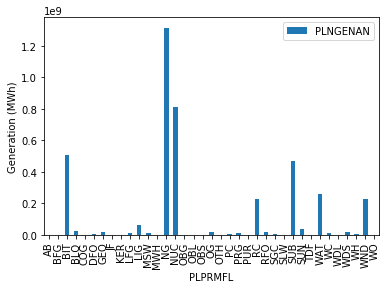

In [41]:
import matplotlib.pyplot as plt

fuel_type_group = egrid.groupby('PLPRMFL').sum()
fuel_type_group
fuel_and_gen    = fuel_type_group[['PLNGENAN']]

fuel_and_gen.plot.bar()
plt.ylabel('Generation (MWh)')
plt.show()

In [47]:
# We can also directly output the answer:
fuel_and_gen[fuel_and_gen['PLNGENAN'] == fuel_and_gen['PLNGENAN'].max()].index[0]

'NG'